In [1]:
#Task 1: Load and Explore the Dataset

import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset with proper error handling
try:
    # Note: If your file has a different name, replace 'Iris.csv' with the correct filename
    df = pd.read_csv('Iris.csv')
    
    # Display the first 5 rows
    print("\nFirst 5 rows:\n", df.head())
    
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    print("Common Iris dataset filenames: 'Iris.csv', 'iris.csv', or 'iris.data'")

# Check data types of each column
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n",df.isnull().sum())

print("\n--- Original DataFrame with Missing Values ---\n", df)
print(f"\n Missing values before cleaning:\n{df.isnull().sum()}\n")

# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with missing values
df_cleaned = df.dropna(axis=1)

# Fill missing values for numeric and text columns
df_cleaned = df.fillna("unknown")

print("\nCleaned Data:\n", df_cleaned)
print("\n Check if all missing values are handled\n", df_cleaned.isnull().sum())


First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Data Types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

--- Original DataFrame with Missing Values ---
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2  

In [2]:
#Task 2: Basic Data Analysis
print("\nBasic statistics for all numerical columns:\n", df_cleaned.describe(include='all'))

# Group by a categorical column ('Species') and compute the mean, Median and Standard Deviation of a numerical column
grouped_mean = df.groupby('Species')[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean()
grouped_median = df.groupby('Species')[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].median()
grouped_std = df.groupby('Species')[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].std()

# Display the result
print("\n Grouped Mean for Different Species:\n", grouped_mean)
print("\n Grouped Median for Different Species:\n", grouped_median)
print("\n Grouped Standard Deviation for Different Species:\n", grouped_std)

#  Patterns or interesting findings from your analysis.
print("\nFrom the Analysis, We can observe clear differences between species:\n")
print("- Iris-setosa has the shortest sepals and petals but the widest sepals.\n- Iris-virginica has the longest sepals and petals.\n- Iris-versicolor has measurements that generally fall between the other two species.")
print("\nBased on the grouped means table, there is a clear distinct species difference like in the Setosa with significantly small petals.\nUsing petal measurements, there is a clear separation that suggests that a simple rule_based clissifier can easily distinguish Setosa from other species with high accuracy while Versicolor and Virginica may require more complex analysis due to overlap in their measurements")


Basic statistics for all numerical columns:
                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count   150.000000     150.000000    150.000000     150.000000    150.000000   
unique         NaN            NaN           NaN            NaN           NaN   
top            NaN            NaN           NaN            NaN           NaN   
freq           NaN            NaN           NaN            NaN           NaN   
mean     75.500000       5.843333      3.054000       3.758667      1.198667   
std      43.445368       0.828066      0.433594       1.764420      0.763161   
min       1.000000       4.300000      2.000000       1.000000      0.100000   
25%      38.250000       5.100000      2.800000       1.600000      0.300000   
50%      75.500000       5.800000      3.000000       4.350000      1.300000   
75%     112.750000       6.400000      3.300000       5.100000      1.800000   
max     150.000000       7.900000      4.400000       6.900000      2.5000

Line Chart



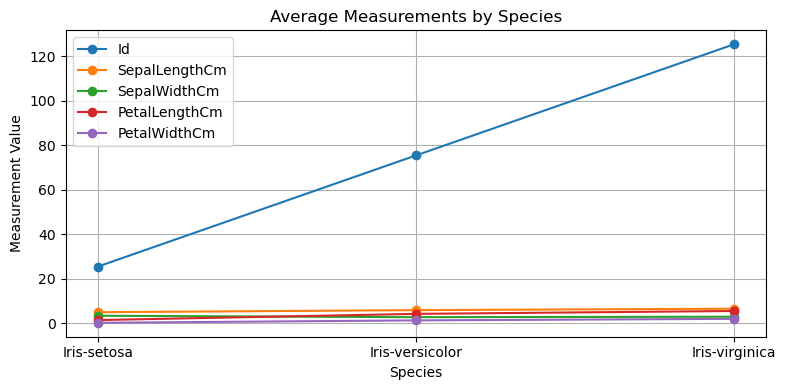

In [7]:
# Task 3: Data Visualization
# Line Chart
print("Line Chart\n")
# Group by species and compute mean for each numerical column
grouped = df.groupby('Species').mean()

# Plot the trends
plt.figure(figsize=(8, 4))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], marker='o', label=column)

plt.title('Average Measurements by Species')
plt.xlabel('Species')
plt.ylabel('Measurement Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Bar chart


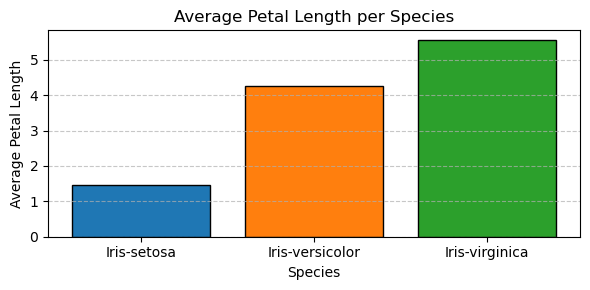

In [9]:
# Bar chart
print("Bar chart")
# Group by species and calculate the mean petal length
grouped = df.groupby('Species')['PetalLengthCm'].mean()

# Define custom colors for each species
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Plot a bar chart
plt.figure(figsize=(6, 3))
plt.bar(grouped.index, grouped.values, color=colors, edgecolor='black')

# Customize the chart
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Histogram


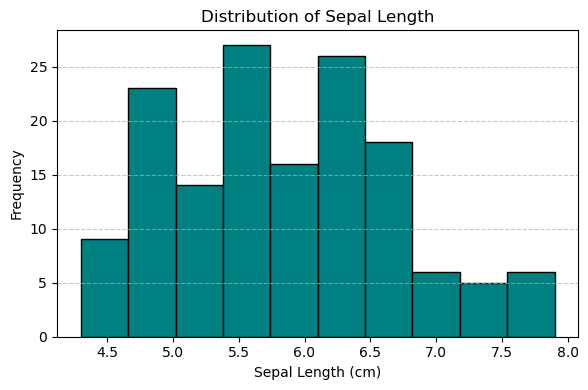

In [11]:
# Histogram
print("Histogram")
# Plot histogram for sepal length
plt.figure(figsize=(6, 4))
plt.hist(df['SepalLengthCm'], bins=10, color='teal', edgecolor='black')

# Customize the plot
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Scatter plot 


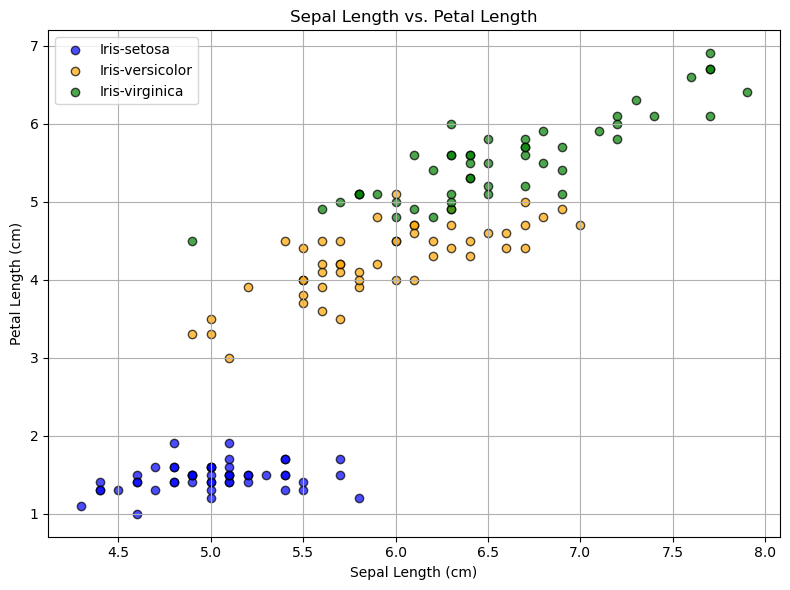

In [12]:
print("Scatter plot ")
# Scatter plot
plt.figure(figsize=(8, 6))
Species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'}

for Species, color in Species_colors.items():
    subset = df[df['Species'] == Species]
    plt.scatter(subset['SepalLengthCm'], subset['PetalLengthCm'],
                label=Species, color=color, alpha=0.7, edgecolor='k')
# Customize the plot
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
